### SVM(Support Vector Machine) with feature scaling

In [1]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./updated_features1.csv")

In [3]:
df.head(10)

,HRV,SDSD,SDNN,RMSSD,PNN50,TINN,HTI,APEN,SD1,SD2,SDRatio,PLF,PHF,LFHFRatio,VLF,LF,HF,Class
0,0.908052,0.063515,5.642670,0.918895,1.0,0.015625,5.0,-0.033886,0.044912,7.600414,0.005721,80.762525,19.237475,4.198197,2.355132,0.090640,0.021664,GSVT
1,1.072700,0.180842,5.910351,1.087850,1.0,0.015625,5.0,0.128246,0.127875,7.923999,0.016138,82.000059,17.999941,4.555574,2.592221,0.129439,0.028416,AFIB
2,1.980903,0.530627,5.876639,2.050607,1.0,0.015625,3.0,-0.117783,0.375210,7.544863,0.049727,79.533708,20.466292,3.886083,2.608582,0.181173,0.046686,AFIB
3,0.519595,0.420627,5.479227,0.688756,1.0,0.015625,9.5,-0.015702,0.297428,7.532173,0.039433,81.805008,18.194992,4.496253,2.743589,0.070468,0.014770,GSVT
4,1.326730,0.327176,5.804215,1.366546,1.0,0.015625,4.0,0.024913,0.231348,7.675483,0.030142,81.627847,18.372153,4.443020,3.301605,0.204897,0.046112,AFIB
5,1.151367,0.003380,5.640783,1.151494,1.0,0.015625,4.0,-0.064539,0.002390,7.506334,0.000318,81.832097,18.167903,4.504213,2.912595,0.148940,0.033092,GSVT
6,0.544364,0.001887,5.655564,0.544368,1.0,0.015625,9.0,-0.027754,0.001335,7.775834,0.000172,81.481495,18.518505,4.400004,2.872678,0.072375,0.016454,GSVT
7,1.746484,0.208049,5.666119,1.758834,1.0,0.015625,4.0,-0.105361,0.147113,7.337083,0.020050,74.536944,25.463056,2.927260,2.438525,0.144999,0.049534,SA
8,1.461238,0.119478,6.002428,1.466089,1.0,0.015625,4.0,-0.080043,0.084484,7.914758,0.010674,80.329552,19.670448,4.083768,3.582712,0.207991,0.050945,SA
9,2.116211,0.046002,5.643520,2.116839,1.0,0.015625,2.5,-0.125657,0.032528,7.289371,0.004743,79.317211,20.682789,3.834955,2.536577,0.194250,0.052478,SB


### Feature Scaling

In [11]:
classList = df.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(classList)
Y

array([1, 0, 0, ..., 0, 0, 0])

In [12]:
dict(enumerate(convertor.classes_))

{0: 'AFIB', 1: 'GSVT', 2: 'SA', 3: 'SB', 4: 'SR'}

In [13]:
fit = StandardScaler()
X = fit.fit_transform(df.iloc[:, :-1])
X

array([[-1.28456778, -0.29840352,  0.09833725, ..., -0.65540195,
        -1.21270515, -1.32340512],
       [-0.97291611,  0.50576379,  1.34298072, ..., -0.12936319,
        -0.6240159 , -0.91389081],
       [ 0.74616921,  2.90321171,  1.18622862, ..., -0.09306054,
         0.16092978,  0.1941742 ],
       ...,
       [ 0.65908532,  2.64495768,  0.45377194, ..., -0.55573883,
        -0.79443383, -0.50604782],
       [-0.14438682,  0.98281684,  0.57193916, ..., -1.34315663,
        -1.02294007, -0.37811668],
       [-0.62745595,  0.98819463,  0.9260074 , ...,  1.50069202,
         0.11838924, -0.03357032]])

In [14]:
X.shape

(10498, 17)

In [15]:
df.shape

(10498, 18)

In [16]:
labels = ['AFIB','GSVT','SA','SB','SR']

### Split dataset

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [18]:
print(f'Training sample: X = {X_train.shape}, Y = {Y_train.shape}')
print(f'Testing sample: X = {X_test.shape}, Y = {Y_test.shape}')

Training sample: X = (8398, 17), Y = (8398,)
Testing sample: X = (2100, 17), Y = (2100,)


In [30]:
class ECG:
    def svm_classifier(self, X_train, Y_train, X_test):
        print("[INFO]: Training the model...")
        rbf = svm.SVC(kernel="rbf").fit(X_train, Y_train)
        rbf_pred = rbf.predict(X_test)
        return rbf_pred
    
    def GradientBoosting(self, X_train, Y_train, X_test):
        print("[INFO]: Training the model...")
        model = GradientBoostingClassifier()
        gb = model.fit(X_train, Y_train)
        gb_pred = gb.predict(X_test)
        return gb_pred
    
    def predict(self, Y_test, pred, labels):
        rbf_acc = accuracy_score(Y_test, pred)
        rbf_f1 = f1_score(Y_test, pred, average="weighted")
        print('\nAccuracy (RBF Kernel): ', "%.2f" % (rbf_acc*100))
        print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

        print("\n==================== CONFUSION MATRIX ====================\n")
        cm = confusion_matrix(Y_test, pred)
        print(cm)

        print("\n==================== CLASSIFICATION REPORT ====================\n")
        cr = classification_report(Y_test, pred)
        print(cr)

        print("\n==================== HEATMAP ====================\n")
        plt.figure(figsize=(10,7))
        sns.heatmap(cm,annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')

[INFO]: Training the model...

Accuracy (RBF Kernel):  90.57
F1 (RBF Kernel):  90.46

==================== CONFUSION MATRIX ====================

[[371  35   9  15   9]
 [ 51 418   1   0   0]
 [ 15   1  37   3  15]
 [ 15   0   0 750   1]
 [  8   7   6   7 326]]

==================== CLASSIFICATION REPORT ====================

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       439
           1       0.91      0.89      0.90       470
           2       0.70      0.52      0.60        71
           3       0.97      0.98      0.97       766
           4       0.93      0.92      0.92       354

    accuracy                           0.91      2100
   macro avg       0.86      0.83      0.84      2100
weighted avg       0.90      0.91      0.90      2100


==================== HEATMAP ====================



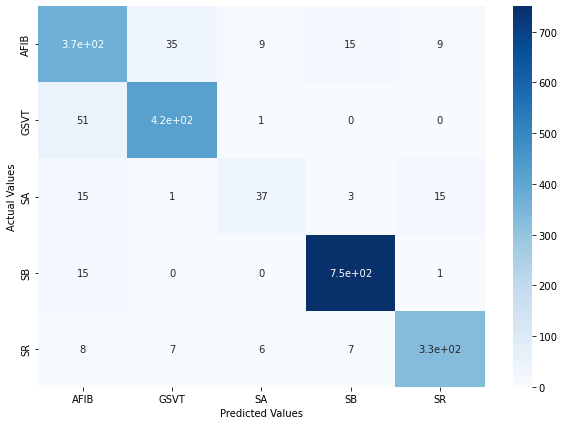

In [53]:
svm1 = ECG()
svm1_pred = svm1.svm_classifier(X_train, Y_train, X_test)
svm1.predict(Y_test, svm1_pred, labels)

[INFO]: Training the model...

Accuracy (RBF Kernel):  91.43
F1 (RBF Kernel):  91.43

==================== CONFUSION MATRIX ====================

[[361  40  11  17  10]
 [ 39 430   1   0   0]
 [ 15   1  48   1   6]
 [ 12   0   1 751   2]
 [  6   2  13   3 330]]

==================== CLASSIFICATION REPORT ====================

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       439
           1       0.91      0.91      0.91       470
           2       0.65      0.68      0.66        71
           3       0.97      0.98      0.98       766
           4       0.95      0.93      0.94       354

    accuracy                           0.91      2100
   macro avg       0.86      0.87      0.86      2100
weighted avg       0.91      0.91      0.91      2100


==================== HEATMAP ====================



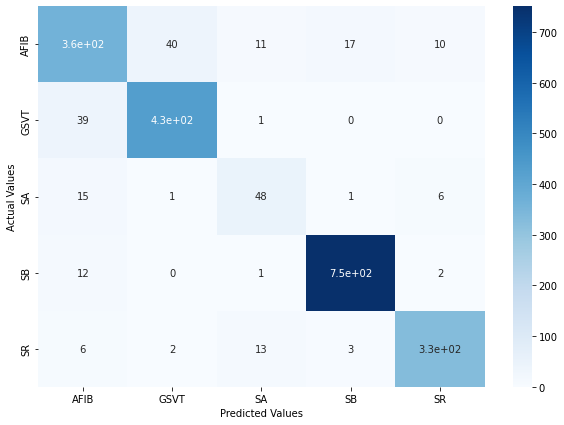

In [33]:
Gb = ECG()
gb_pred = Gb.GradientBoosting(X_train, Y_train, X_test)
Gb.predict(Y_test, gb_pred, labels)